1: Loading libraries and dataset

In [44]:
# libraries
import random
import numpy as np
import numpy.random as r
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [2]:
import os
os.chdir("/content")

In [7]:
df_old = pd.read_csv('coc_clans_dataset.csv', index_col = 0)

In [8]:
df_old.head()

,clan_name,clan_type,clan_description,clan_location,isFamilyFriendly,clan_badge_url,clan_level,clan_points,clan_builder_base_points,clan_versus_points,...,clan_war_league,num_members,required_builder_base_trophies,required_versus_trophies,required_townhall_level,clan_capital_hall_level,clan_capital_points,capital_league,mean_member_level,mean_member_trophies
clan_tag,,,,,,,,,,,,,,,,,,,,,
#UQVQRJQ0,KOJIS' CLAN,closed,STRATEGY IS MUST...RESPECT THE OTHERS...FORGIV...,International,True,https://api-assets.clashofclans.com/badges/200...,6,6887,5213,5213,...,Unranked,11,1000,1000,1,1,0,Unranked,83,1254
#2QC9Y0CQU,uye,open,NaN,Indonesia,True,https://api-assets.clashofclans.com/badges/200...,1,876,1019,1019,...,Unranked,1,0,0,1,0,0,Unranked,90,1752
#202CJRP2U,Uprising rivals,open,💥official uprising rivals clan💥we bring 10% lu...,Indonesia,True,https://api-assets.clashofclans.com/badges/200...,1,732,670,670,...,Unranked,2,0,0,1,0,0,Unranked,30,733
#2Y89RRGLY,2inchersonly,open,"Whom is not packing the meat, Shall be packing...",International,True,https://api-assets.clashofclans.com/badges/200...,2,1156,457,457,...,Bronze League I,2,0,0,1,1,0,Unranked,61,1156
#99PU9QPY,aymil,open,regla1=no empezar la guerra sin mi permiso reg...,International,True,https://api-assets.clashofclans.com/badges/200...,2,674,399,399,...,Unranked,2,0,0,1,0,0,Unranked,23,674


In [ ]:
df_old.describe()

2. Data cleaning! This includes:
- removing NaN values/columns
- removing qualitative columns
- transforming features with categorical values
  - one-hot and ordinal encoding

In [4]:
df_old.isnull().sum()

NameError: name 'df_old' is not defined

In [9]:
# removing columns with qualitative data that we can't use, or just harder to work with (too many NaN values)
df = df_old.drop(columns=['clan_name', 'clan_description','clan_badge_url','clan_location', 'required_trophies',
                          'required_builder_base_trophies', 'required_versus_trophies', 'required_townhall_level'], axis=1)
df

,clan_type,isFamilyFriendly,clan_level,clan_points,clan_builder_base_points,clan_versus_points,war_frequency,war_win_streak,war_wins,war_ties,war_losses,clan_war_league,num_members,clan_capital_hall_level,clan_capital_points,capital_league,mean_member_level,mean_member_trophies
clan_tag,,,,,,,,,,,,,,,,,,
#UQVQRJQ0,closed,True,6,6887,5213,5213,moreThanOncePerWeek,1,93,0,31,Unranked,11,1,0,Unranked,83,1254
#2QC9Y0CQU,open,True,1,876,1019,1019,unknown,0,0,0,0,Unranked,1,0,0,Unranked,90,1752
#202CJRP2U,open,True,1,732,670,670,always,1,1,0,0,Unranked,2,0,0,Unranked,30,733
#2Y89RRGLY,open,True,2,1156,457,457,always,0,7,0,11,Bronze League I,2,1,0,Unranked,61,1156
#99PU9QPY,open,True,2,674,399,399,always,0,3,0,11,Unranked,2,0,0,Unranked,23,674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
#JP9Q8QQU,open,False,1,332,141,141,moreThanOncePerWeek,0,0,0,0,Unranked,2,0,0,Unranked,8,332
#VUV2URJ,open,False,1,317,71,71,unknown,0,0,0,0,Unranked,1,0,0,Unranked,12,635
#22C2PCPUG,open,False,1,379,338,338,unknown,0,0,0,1,Unranked,2,0,0,Unranked,17,379


In [10]:
"""
Now we transform features that are not numerical using different types of encoding.
Features with natural ordering:
clan_war_league
capital_league

Features with non-natural ordering:
war_frequency
clan_type

Boolean features:
isFamilyFriendly

"""
# boolean conversion to int
df['isFamilyFriendly'] = df['isFamilyFriendly'].astype(int)

# ordinal encoding of clan_war_league
unique = set(df["clan_war_league"])
unique

{'Bronze League I',
 'Bronze League II',
 'Bronze League III',
 'Champion League I',
 'Champion League II',
 'Champion League III',
 'Crystal League I',
 'Crystal League II',
 'Crystal League III',
 'Gold League I',
 'Gold League II',
 'Gold League III',
 'Master League I',
 'Master League II',
 'Master League III',
 'Silver League I',
 'Silver League II',
 'Silver League III',
 'Unranked'}

In [11]:
war_league_scale = {"Unranked":0, "Bronze League I":1, "Bronze League II":2, "Bronze League III":3, "Silver League I":4, "Silver League II":5, "Silver League III":6, "Gold League I":7, "Gold League II":8, "Gold League III":9, "Crystal League I":10, "Crystal League II":11, "Crystal League III":12, "Master League I":13, "Master League II":14, "Master League III":15, "Champion League I":16, "Champion League II":17, "Champion League III":18}

In [12]:
df["clan_war_league"] = df["clan_war_league"].replace(war_league_scale)
df["clan_war_league"]

clan_tag
#UQVQRJQ0      0
#2QC9Y0CQU     0
#202CJRP2U     0
#2Y89RRGLY     1
#99PU9QPY      0
              ..
#JP9Q8QQU      0
#VUV2URJ       0
#22C2PCPUG     0
#2YU8QJJU8    11
#2YRU29GGL     0
Name: clan_war_league, Length: 3559743, dtype: int64

In [13]:
# ordinal encoding of capital_league
unique = set(df["capital_league"])
unique

{'Bronze League I',
 'Bronze League II',
 'Bronze League III',
 'Champion League I',
 'Champion League II',
 'Champion League III',
 'Crystal League I',
 'Crystal League II',
 'Crystal League III',
 'Gold League I',
 'Gold League II',
 'Gold League III',
 'Legend League',
 'Master League I',
 'Master League II',
 'Master League III',
 'Silver League I',
 'Silver League II',
 'Silver League III',
 'Titan League I',
 'Titan League II',
 'Titan League III',
 'Unranked'}

In [14]:
capital_league_scale = {"Unranked":0, "Bronze League I":1, "Bronze League II":2, "Bronze League III":3, "Silver League I":4, "Silver League II":5, "Silver League III":6, "Gold League I":7, "Gold League II":8, "Gold League III":9, "Crystal League I":10, "Crystal League II":11, "Crystal League III":12, "Master League I":13, "Master League II":14, "Master League III":15, "Champion League I":16, "Champion League II":17, "Champion League III":18, "Titan League I":19, "Titan League II":20, "Titan League III":21,"Legend League":22}
df["capital_league"] = df["capital_league"].replace(capital_league_scale)
df["capital_league"]

clan_tag
#UQVQRJQ0     0
#2QC9Y0CQU    0
#202CJRP2U    0
#2Y89RRGLY    0
#99PU9QPY     0
             ..
#JP9Q8QQU     0
#VUV2URJ      0
#22C2PCPUG    0
#2YU8QJJU8    0
#2YRU29GGL    0
Name: capital_league, Length: 3559743, dtype: int64

In [15]:
# one-hot encoding war_frequency
df = pd.get_dummies(df, columns=['war_frequency', ])
df['war_frequency_always'] = df['war_frequency_always'].astype(int)
df['war_frequency_lessThanOncePerWeek'] = df['war_frequency_lessThanOncePerWeek'].astype(int)
df['war_frequency_moreThanOncePerWeek'] = df['war_frequency_moreThanOncePerWeek'].astype(int)
df['war_frequency_never'] = df['war_frequency_never'].astype(int)
df['war_frequency_oncePerWeek'] = df['war_frequency_oncePerWeek'].astype(int)
df['war_frequency_unknown'] = df['war_frequency_unknown'].astype(int)
df

,clan_type,isFamilyFriendly,clan_level,clan_points,clan_builder_base_points,clan_versus_points,war_win_streak,war_wins,war_ties,war_losses,...,clan_capital_points,capital_league,mean_member_level,mean_member_trophies,war_frequency_always,war_frequency_lessThanOncePerWeek,war_frequency_moreThanOncePerWeek,war_frequency_never,war_frequency_oncePerWeek,war_frequency_unknown
clan_tag,,,,,,,,,,,,,,,,,,,,,
#UQVQRJQ0,closed,1,6,6887,5213,5213,1,93,0,31,...,0,0,83,1254,0,0,1,0,0,0
#2QC9Y0CQU,open,1,1,876,1019,1019,0,0,0,0,...,0,0,90,1752,0,0,0,0,0,1
#202CJRP2U,open,1,1,732,670,670,1,1,0,0,...,0,0,30,733,1,0,0,0,0,0
#2Y89RRGLY,open,1,2,1156,457,457,0,7,0,11,...,0,0,61,1156,1,0,0,0,0,0
#99PU9QPY,open,1,2,674,399,399,0,3,0,11,...,0,0,23,674,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
#JP9Q8QQU,open,0,1,332,141,141,0,0,0,0,...,0,0,8,332,0,0,1,0,0,0
#VUV2URJ,open,0,1,317,71,71,0,0,0,0,...,0,0,12,635,0,0,0,0,0,1
#22C2PCPUG,open,0,1,379,338,338,0,0,0,1,...,0,0,17,379,0,0,0,0,0,1


In [16]:
# one-hot encoding clan_type
df = pd.get_dummies(df, columns=['clan_type', ])
df['clan_type_closed'] = df['clan_type_closed'].astype(int)
df['clan_type_inviteOnly'] = df['clan_type_inviteOnly'].astype(int)
df['clan_type_open'] = df['clan_type_open'].astype(int)
df

,isFamilyFriendly,clan_level,clan_points,clan_builder_base_points,clan_versus_points,war_win_streak,war_wins,war_ties,war_losses,clan_war_league,...,mean_member_trophies,war_frequency_always,war_frequency_lessThanOncePerWeek,war_frequency_moreThanOncePerWeek,war_frequency_never,war_frequency_oncePerWeek,war_frequency_unknown,clan_type_closed,clan_type_inviteOnly,clan_type_open
clan_tag,,,,,,,,,,,,,,,,,,,,,
#UQVQRJQ0,1,6,6887,5213,5213,1,93,0,31,0,...,1254,0,0,1,0,0,0,1,0,0
#2QC9Y0CQU,1,1,876,1019,1019,0,0,0,0,0,...,1752,0,0,0,0,0,1,0,0,1
#202CJRP2U,1,1,732,670,670,1,1,0,0,0,...,733,1,0,0,0,0,0,0,0,1
#2Y89RRGLY,1,2,1156,457,457,0,7,0,11,1,...,1156,1,0,0,0,0,0,0,0,1
#99PU9QPY,1,2,674,399,399,0,3,0,11,0,...,674,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
#JP9Q8QQU,0,1,332,141,141,0,0,0,0,0,...,332,0,0,1,0,0,0,0,0,1
#VUV2URJ,0,1,317,71,71,0,0,0,0,0,...,635,0,0,0,0,0,1,0,0,1
#22C2PCPUG,0,1,379,338,338,0,0,0,1,0,...,379,0,0,0,0,0,1,0,0,1


3. Pre-processing! Our pre-processing includes:
- Removing highly-correlated features
  - Avoid multicollinearity
- Splitting data into test/train sets
  - randomly sampling ~ 50K clans
  - undersampling: majority of data is weaker clans
  - for linear svm: scaling the data

In [17]:
# check correlatation between clan points and other potential features
corr = df[['clan_points', 'clan_capital_points', 'clan_level', 'clan_builder_base_points', 'clan_versus_points', 'war_win_streak','war_wins', 'war_ties', 'war_losses', 'num_members', 'mean_member_level', 'mean_member_trophies', 'clan_capital_hall_level']].corr()
corr.style.background_gradient(cmap='coolwarm')
# Note: this doesn't include the correlation values for columns with categorical data. We will deal with those later.

,clan_points,clan_capital_points,clan_level,clan_builder_base_points,clan_versus_points,war_win_streak,war_wins,war_ties,war_losses,num_members,mean_member_level,mean_member_trophies,clan_capital_hall_level
clan_points,1.000000,0.862496,0.824389,0.987212,0.987212,0.223504,0.680949,0.180780,0.471435,0.920488,0.605944,0.706063,0.913003
clan_capital_points,0.862496,1.000000,0.710951,0.831638,0.831638,0.201750,0.607014,0.132898,0.372918,0.737654,0.465679,0.577706,0.823345
clan_level,0.824389,0.710951,1.000000,0.816230,0.816230,0.222638,0.902491,0.297198,0.620996,0.720731,0.595113,0.640521,0.826961
clan_builder_base_points,0.987212,0.831638,0.816230,1.000000,1.000000,0.216458,0.667594,0.178884,0.471627,0.922360,0.621181,0.706672,0.910841
clan_versus_points,0.987212,0.831638,0.816230,1.000000,1.000000,0.216458,0.667594,0.178884,0.471627,0.922360,0.621181,0.706672,0.910841
war_win_streak,0.223504,0.201750,0.222638,0.216458,0.216458,1.000000,0.196406,0.077511,0.081841,0.221279,0.138575,0.155757,0.230910
war_wins,0.680949,0.607014,0.902491,0.667594,0.667594,0.196406,1.000000,0.324560,0.596809,0.568323,0.500557,0.530740,0.662279
war_ties,0.180780,0.132898,0.297198,0.178884,0.178884,0.077511,0.324560,1.000000,0.395787,0.174496,0.163385,0.151579,0.190822
war_losses,0.471435,0.372918,0.620996,0.471627,0.471627,0.081841,0.596809,0.395787,1.000000,0.419300,0.355180,0.374324,0.465148
num_members,0.920488,0.737654,0.720731,0.922360,0.922360,0.221279,0.568323,0.174496,0.419300,1.000000,0.457812,0.541583,0.830745


In [18]:
# Based on the above correlations, we can assume that clan_versus_points
# and clan_builder_base_points are the same, so we can remove one.
df = df.drop(columns=['clan_versus_points'], axis=1)
# It seems that some variables are highly correlated with our target variable and each other, so let's remove those.
df = df.drop(columns=['clan_builder_base_points', 'num_members', 'clan_capital_hall_level'], axis=1)
# We may experiment with adding these columns back later

In [19]:
df.columns

Index(['isFamilyFriendly', 'clan_level', 'clan_points', 'war_win_streak',
       'war_wins', 'war_ties', 'war_losses', 'clan_war_league',
       'clan_capital_points', 'capital_league', 'mean_member_level',
       'mean_member_trophies', 'war_frequency_always',
       'war_frequency_lessThanOncePerWeek',
       'war_frequency_moreThanOncePerWeek', 'war_frequency_never',
       'war_frequency_oncePerWeek', 'war_frequency_unknown',
       'clan_type_closed', 'clan_type_inviteOnly', 'clan_type_open'],
      dtype='object')

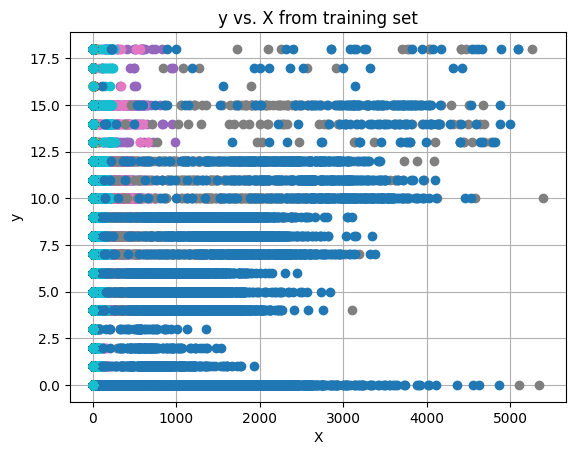

In [35]:
# Now we can split the data and randomly select 1000 features!
# 50000 was chosen to allow Linear SVM to run without taking exorbent amounts of time

df_sample = df.sample(n=50000)

features = ['isFamilyFriendly', 'clan_level',
       'war_win_streak', 'war_wins', 'war_ties', 'war_losses',
       'clan_capital_points', 'capital_league', 'mean_member_level',
        'mean_member_trophies', 'war_frequency_always', 'war_frequency_lessThanOncePerWeek',
        'war_frequency_moreThanOncePerWeek', 'war_frequency_never',
       'war_frequency_oncePerWeek', 'war_frequency_unknown',
       'clan_type_closed', 'clan_type_inviteOnly', 'clan_type_open']

# Taking all features for prediction
# Starting with a column of ones for a w_0 term
X = np.empty((50000,1))
#create X from all features excluding clan_war_league
for feature in features:
  new_col = df_sample[feature].to_numpy()
  new_col = new_col.reshape(new_col.shape[0], 1)
  X = np.append(X, new_col, axis=1)
#predicting on clan_war_league
y = df_sample['clan_war_league'].to_numpy()

#creating a scaler for use later in neural networks
sclr = StandardScaler()
sclr = sclr.fit(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

y_train = y_train.reshape(y_train.shape[0], 1)

# Let's plot X_train and y_train to see the distribution of training data
plt.plot(X_train,y_train,'o')
plt.title('y vs. X from training set')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
plt.show(block=False)

In [36]:
print(X_train.shape)

(37500, 20)


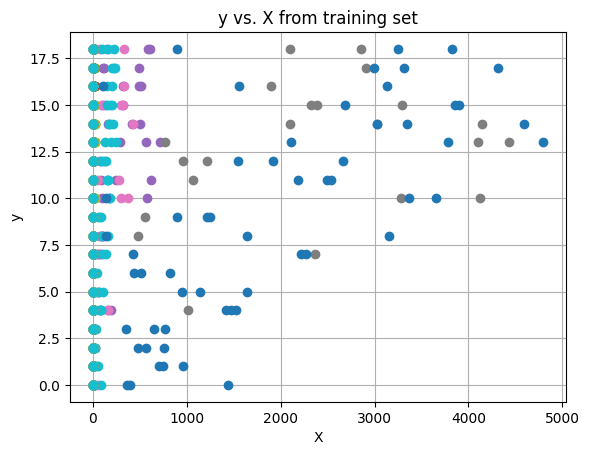

In [39]:
# Since most points are centered around the bottom of the graph, we need to make sure we
# are representing all data points properly, so we will undersample:
rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)
plt.plot(X_train,y_train,'o')
plt.title('y vs. X from training set')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
plt.show(block=False)

4. The Neural Network implementation is below, mostly similar to the Neural Network implementation from Homework 5. We have a factor of regularization in one trial and removed in the other. We also use RELU activation with regularization in a third trial. The main trials are:
- Sigmoid activation, no regularization, 1000 iterations
- Sigmoid activation, no regularization, 15000 iterations
- Sigmoid activation, alpha = 10, 15000 iterations
- Sigmoid activation, lambda = 1, 15000 iterations
- Sigmoid activation, lambda = 1000, 15000 iterations
- RELU activation, no regularization, 15000 iterations
- RELU activation, no regularization, 15000 iterations
- RELU activation, lambda = 1, 15000 iterations
- RELU activation, lambda = 1000, 15000 iterations

In [40]:
#Scaling the dataset
X_train_scaled = sclr.transform(X_train)
X_test_scaled = sclr.transform(X_test)

In [25]:
#Define all the activation functions

#sigmoid
def f_sig(z):
  return 1 / (1 + np.exp(-z))

def f_sig_deriv(z):
  return f_sig(z) * (1 - f_sig(z))

#relu
def f_relu(z):
  return np.maximum(0, z)

def f_relu_deriv(z):
  return np.where(z < 0, 0, 1)

In [26]:
#creating and initializing W and b randomly
def setup_and_init_weights(nn_structure):
    W = {} #creating a dictionary i.e. a set of key: value pairs
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1])) #Return “continuous uniform” random floats in the half-open interval [0.0, 1.0).
        b[l] = r.random_sample((nn_structure[l],))
    return W, b

In [27]:
#initialize tri values of W and b to be 0
def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b

In [28]:
#forward pass function for each activation
def feed_forward_sig(x, W, b):
    a = {1: x} # create a dictionary for holding the a values for all levels
    z = { } # create a dictionary for holding the z values for all the layers
    for l in range(1, len(W) + 1): # for each layer
        node_in = a[l]
        z[l+1] = W[l].dot(node_in) + b[l]  # z^(l+1) = W^(l)*a^(l) + b^(l)
        a[l+1] = f_sig(z[l+1]) # a^(l+1) = f(z^(l+1))
    return a, z

#forward pass function for each activation
def feed_forward_relu(x, W, b):
    a = {1: x} # create a dictionary for holding the a values for all levels
    z = { } # create a dictionary for holding the z values for all the layers
    for l in range(1, len(W) + 1): # for each layer
        node_in = a[l]
        z[l+1] = W[l].dot(node_in) + b[l]  # z^(l+1) = W^(l)*a^(l) + b^(l)
        a[l+1] = f_relu(z[l+1]) # a^(l+1) = f(z^(l+1))
    return a, z

In [29]:
#calculating deltas
def calculate_out_layer_delta_sig(y, a_out, z_out):
    # delta^(nl) = -(y_i - a_i^(nl)) * f'(z_i^(nl))
    return -(y-a_out) * f_sig_deriv(z_out)


def calculate_hidden_delta_sig(delta_plus_1, w_l, z_l):
    # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(z^(l))
    return np.dot(np.transpose(w_l), delta_plus_1) * f_sig_deriv(z_l)

def calculate_out_layer_delta_relu(y, a_out, z_out):
    # delta^(nl) = -(y_i - a_i^(nl)) * f'(z_i^(nl))
    return -(y-a_out) * f_relu_deriv(z_out)

def calculate_hidden_delta_relu(delta_plus_1, w_l, z_l):
    # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(z^(l))
    return np.dot(np.transpose(w_l), delta_plus_1) * f_relu_deriv(z_l)

In [30]:
#train method with ability to indicate lambda and activation function
def train_nn(nn_structure, X, y, iter_num=3000, alpha=0.1, lam=0, func ='sig'):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    N = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%1000 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(N):
            delta = {}
            # perform the feed forward pass and return the stored a and z values, to be used in the
            # gradient descent step
            if func == 'sig':
              a, z = feed_forward_sig(X[i, :], W, b)
            else:
              a, z = feed_forward_relu(X[i, :], W, b)
            # loop from nl-1 to 1 backpropagating the errors
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    if func == 'sig':
                      delta[l] = calculate_out_layer_delta_sig(y[i,:], a[l], z[l])
                    else:
                      delta[l] = calculate_out_layer_delta_relu(y[i,:], a[l], z[l])
                    avg_cost += np.linalg.norm((y[i,:]-a[l]))
                else:
                    if l > 1:
                        if func == 'sig':
                          delta[l] = calculate_hidden_delta_sig(delta[l+1], W[l], z[l])
                        else:
                          delta[l] = calculate_hidden_delta_relu(delta[l+1], W[l], z[l])
                    # triW^(l) = triW^(l) + delta^(l+1) * transpose(a^(l))
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(a[l][:,np.newaxis]))# np.newaxis increase the number of dimensions
                    # trib^(l) = trib^(l) + delta^(l+1)
                    tri_b[l] += delta[l+1]
        # perform the gradient descent step for the weights in each layer
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha * ((1.0/N * tri_W[l]))
            b[l] += -alpha * (1.0/N * tri_b[l])
        # complete the average cost calculation
        for curr in W:
          avg_cost += lam/2 * np.sum(curr**2)
        avg_cost = 1.0/N * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func

def predict_y(W, b, X, n_layers, func='sig'):
    N = X.shape[0]
    y = np.zeros((N,))
    for i in range(N):
        if func =='sig':
          a, z = feed_forward_sig(X[i, :], W, b)
        else:
          a, z = feed_forward_relu(X[i, :], W, b)
        y[i] = np.argmax(a[n_layers])
    return y

Our input and output layer for the neural network is static at 20 and 19 thanks to the encoding from earlier. We set the hidden layer to 19 as well.

In [56]:
nn_structure = [20, 19, 19]

# train the NN
W, b, avg_cost_func = train_nn(nn_structure, X_train_scaled, y_train, iter_num=1000, alpha=0.1, lam=0, func="sig")

Starting gradient descent for 1000 iterations
Iteration 0 of 1000


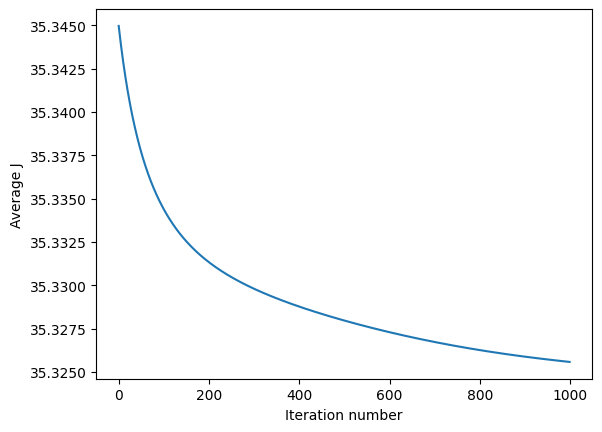

In [57]:
# plot the avg_cost_func
plt.plot(avg_cost_func)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

In [58]:
# get the prediction accuracy and print
y_pred = predict_y(W, b, X_test_scaled, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))

Prediction accuracy is 1.736%


In [59]:
#Train with 15000 iterations:
W, b, avg_cost_func = train_nn(nn_structure, X_train_scaled, y_train, iter_num=15000, alpha=0.1, lam=0, func="sig")

Starting gradient descent for 15000 iterations
Iteration 0 of 15000
Iteration 1000 of 15000
Iteration 2000 of 15000
Iteration 3000 of 15000
Iteration 4000 of 15000
Iteration 5000 of 15000
Iteration 6000 of 15000
Iteration 7000 of 15000
Iteration 8000 of 15000
Iteration 9000 of 15000
Iteration 10000 of 15000
Iteration 11000 of 15000
Iteration 12000 of 15000
Iteration 13000 of 15000
Iteration 14000 of 15000


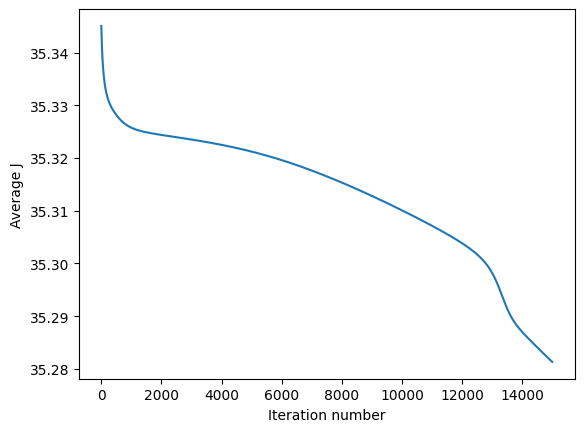

In [60]:
plt.plot(avg_cost_func)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

In [61]:
y_pred = predict_y(W, b, X_test_scaled, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))

Prediction accuracy is 1.184%


In [62]:
#mess with the learning rate
W, b, avg_cost_func = train_nn(nn_structure, X_train_scaled, y_train, iter_num=15000, alpha=10, lam=0, func="sig")

Starting gradient descent for 15000 iterations
Iteration 0 of 15000
Iteration 1000 of 15000
Iteration 2000 of 15000
Iteration 3000 of 15000
Iteration 4000 of 15000
Iteration 5000 of 15000
Iteration 6000 of 15000
Iteration 7000 of 15000
Iteration 8000 of 15000
Iteration 9000 of 15000
Iteration 10000 of 15000
Iteration 11000 of 15000
Iteration 12000 of 15000
Iteration 13000 of 15000
Iteration 14000 of 15000


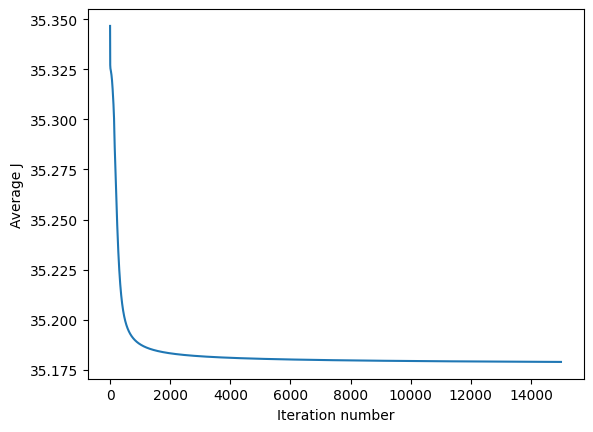

In [63]:
plt.plot(avg_cost_func)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

In [64]:
y_pred = predict_y(W, b, X_test_scaled, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))

Prediction accuracy is 5.52%


In [65]:
#using same alpha, let's mess with regularization
W, b, avg_cost_func = train_nn(nn_structure, X_train_scaled, y_train, iter_num=15000, alpha=10, lam=1, func="sig")

Starting gradient descent for 15000 iterations
Iteration 0 of 15000
Iteration 1000 of 15000
Iteration 2000 of 15000
Iteration 3000 of 15000
Iteration 4000 of 15000
Iteration 5000 of 15000
Iteration 6000 of 15000
Iteration 7000 of 15000
Iteration 8000 of 15000
Iteration 9000 of 15000
Iteration 10000 of 15000
Iteration 11000 of 15000
Iteration 12000 of 15000
Iteration 13000 of 15000
Iteration 14000 of 15000


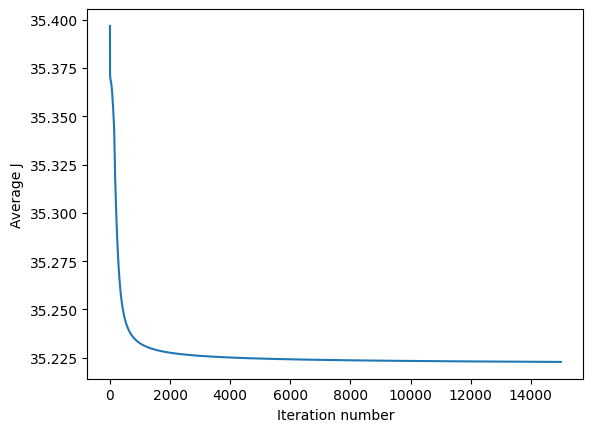

In [66]:
plt.plot(avg_cost_func)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

In [67]:
y_pred = predict_y(W, b, X_test_scaled, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))

Prediction accuracy is 4.568%


In [68]:
#crazy level of regularization
#Train with 15000 iterations since the line above was relatively flat:
W, b, avg_cost_func = train_nn(nn_structure, X_train_scaled, y_train, iter_num=15000, alpha=10, lam=1000, func="sig")

Starting gradient descent for 15000 iterations
Iteration 0 of 15000
Iteration 1000 of 15000
Iteration 2000 of 15000
Iteration 3000 of 15000
Iteration 4000 of 15000
Iteration 5000 of 15000
Iteration 6000 of 15000
Iteration 7000 of 15000
Iteration 8000 of 15000
Iteration 9000 of 15000
Iteration 10000 of 15000
Iteration 11000 of 15000
Iteration 12000 of 15000
Iteration 13000 of 15000
Iteration 14000 of 15000


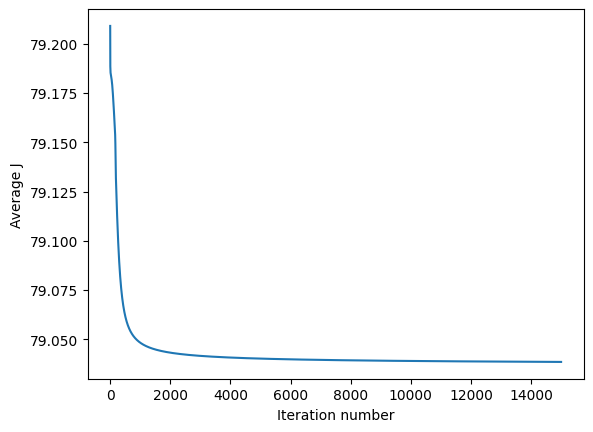

In [69]:
plt.plot(avg_cost_func)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

In [70]:
y_pred = predict_y(W, b, X_test_scaled, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))

Prediction accuracy is 3.728%


In [71]:
#relu time
W, b, avg_cost_func = train_nn(nn_structure, X_train_scaled, y_train, iter_num=1000, alpha=0.1, lam=0, func="relu")

Starting gradient descent for 1000 iterations
Iteration 0 of 1000


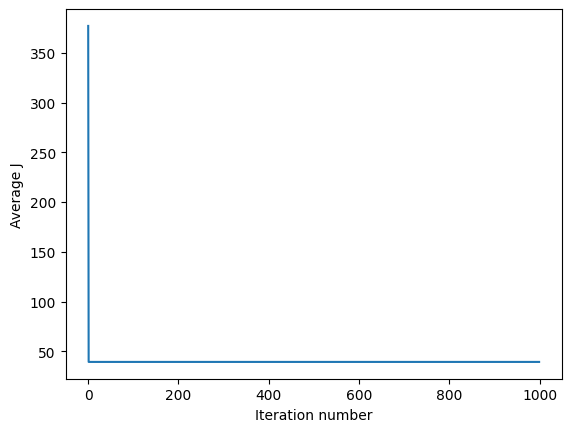

In [72]:
# plot the avg_cost_func
plt.plot(avg_cost_func)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

In [73]:
# get the prediction accuracy and print
y_pred = predict_y(W, b, X_test_scaled, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))

<ipython-input-25-4e71664db167>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Prediction accuracy is 70.856%


In [74]:
#Train with 15000 iterations:
W, b, avg_cost_func = train_nn(nn_structure, X_train_scaled, y_train, iter_num=15000, alpha=0.1, lam=0, func="relu")

Starting gradient descent for 15000 iterations
Iteration 0 of 15000
Iteration 1000 of 15000
Iteration 2000 of 15000
Iteration 3000 of 15000
Iteration 4000 of 15000
Iteration 5000 of 15000
Iteration 6000 of 15000
Iteration 7000 of 15000
Iteration 8000 of 15000
Iteration 9000 of 15000
Iteration 10000 of 15000
Iteration 11000 of 15000
Iteration 12000 of 15000
Iteration 13000 of 15000
Iteration 14000 of 15000


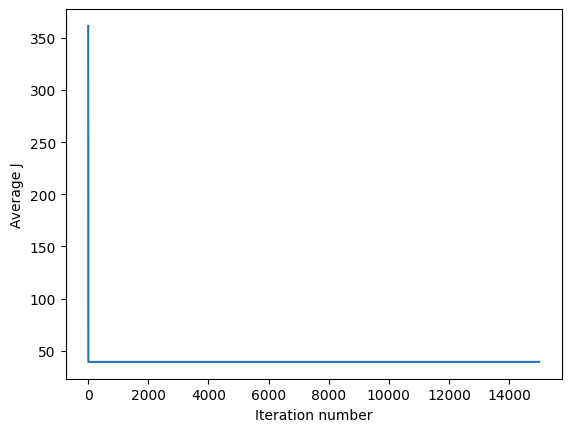

In [75]:
# plot the avg_cost_func
plt.plot(avg_cost_func)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

In [76]:
# get the prediction accuracy and print
y_pred = predict_y(W, b, X_test_scaled, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))

<ipython-input-25-4e71664db167>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Prediction accuracy is 69.472%


In [77]:
#mess with the learning rate
W, b, avg_cost_func = train_nn(nn_structure, X_train_scaled, y_train, iter_num=15000, alpha=10, lam=0, func="relu")

Starting gradient descent for 15000 iterations
Iteration 0 of 15000
Iteration 1000 of 15000
Iteration 2000 of 15000
Iteration 3000 of 15000
Iteration 4000 of 15000
Iteration 5000 of 15000
Iteration 6000 of 15000
Iteration 7000 of 15000
Iteration 8000 of 15000
Iteration 9000 of 15000
Iteration 10000 of 15000
Iteration 11000 of 15000
Iteration 12000 of 15000
Iteration 13000 of 15000
Iteration 14000 of 15000


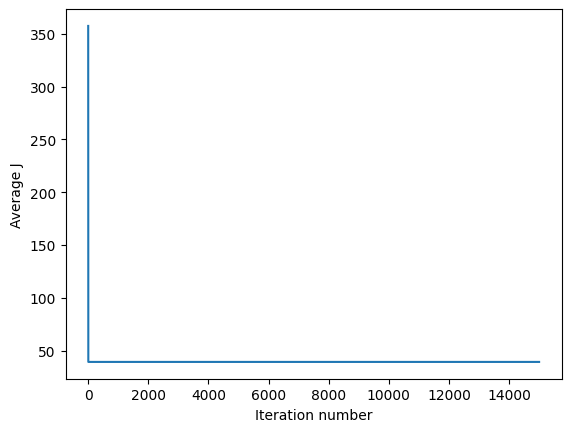

In [78]:
plt.plot(avg_cost_func)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

In [79]:
# get the prediction accuracy and print
y_pred = predict_y(W, b, X_test_scaled, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))

<ipython-input-25-4e71664db167>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Prediction accuracy is 69.312%


In [80]:
#using same alpha, let's mess with regularization
W, b, avg_cost_func = train_nn(nn_structure, X_train_scaled, y_train, iter_num=15000, alpha=10, lam=1, func="relu")

Starting gradient descent for 15000 iterations
Iteration 0 of 15000
Iteration 1000 of 15000
Iteration 2000 of 15000
Iteration 3000 of 15000
Iteration 4000 of 15000
Iteration 5000 of 15000
Iteration 6000 of 15000
Iteration 7000 of 15000
Iteration 8000 of 15000
Iteration 9000 of 15000
Iteration 10000 of 15000
Iteration 11000 of 15000
Iteration 12000 of 15000
Iteration 13000 of 15000
Iteration 14000 of 15000


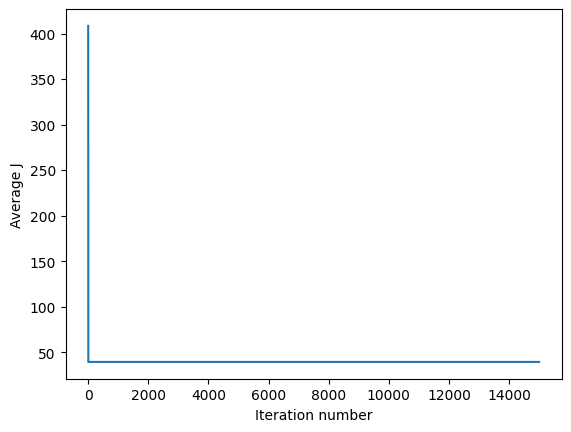

In [81]:
plt.plot(avg_cost_func)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

In [82]:
# get the prediction accuracy and print
y_pred = predict_y(W, b, X_test_scaled, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))

<ipython-input-25-4e71664db167>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Prediction accuracy is 85.392%


In [83]:
#crazy level of regularization
#Train with 15000 iterations since the line above was relatively flat:
W, b, avg_cost_func = train_nn(nn_structure, X_train_scaled, y_train, iter_num=15000, alpha=10, lam=1000, func="relu")

Starting gradient descent for 15000 iterations
Iteration 0 of 15000
Iteration 1000 of 15000
Iteration 2000 of 15000
Iteration 3000 of 15000
Iteration 4000 of 15000
Iteration 5000 of 15000
Iteration 6000 of 15000
Iteration 7000 of 15000
Iteration 8000 of 15000
Iteration 9000 of 15000
Iteration 10000 of 15000
Iteration 11000 of 15000
Iteration 12000 of 15000
Iteration 13000 of 15000
Iteration 14000 of 15000


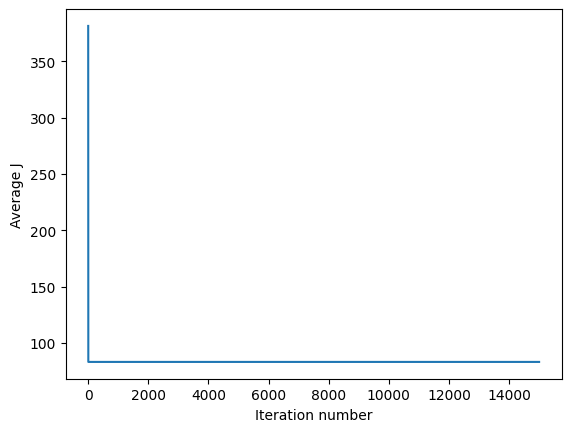

In [84]:
plt.plot(avg_cost_func)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

In [85]:
# get the prediction accuracy and print
y_pred = predict_y(W, b, X_test_scaled, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))

<ipython-input-25-4e71664db167>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Prediction accuracy is 71.36%
